In [ ]:
**Mateo Alexander**

In [ ]:
**PLAN 6113: Exploring Urban Data with Machine Learning**

In [ ]:
**Jonathan Stiles**

In [ ]:
**Homeowkr

In [22]:
# add essential import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###  K-Nearest Neighbors Classification

#### Classifying Iris Species (well-known dataset)

In [23]:
# load the sklearn iris dataset
# this example data is built into sklearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [24]:
# This is a "bunch" object which is a dictionary-type object
# Print the keys to see one way you could organize your data
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [25]:
# The "data" are the variables we use to make predictions.
# In machine learning these are called "features"
# you may also know them as "independent variables"
#print(iris_dataset.data)
print(iris_dataset.feature_names)
# The "target" is the variable being predicted; in this case classes
# These classes need to numbers, but labels show what these numbers mean 
#print(iris_dataset.target)
print(iris_dataset.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [26]:
# To test out and compare models for classification we need to split our data
# into two parts, one will be used for "training" the other will be used for "testing"
# sklearn has a built in function for this, let's import it.
from sklearn.model_selection import train_test_split

# This function takes two ndarrays, one for features, one for target
# This is why the "bunch" object is organized the way it is
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

# X refers to features / y refers to the target classification
# the default split between train and test is .75/.25
# Let's look at shape of our train and test data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
# let's also check the type of this data
print("X_train type:", type(X_train.shape))
print("y_train type:", type(y_train.shape))
print("X_test type:", type(X_test.shape))
print("y_test type:", type(y_test.shape))


X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)
X_train type: <class 'tuple'>
y_train type: <class 'tuple'>
X_test type: <class 'tuple'>
y_test type: <class 'tuple'>


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

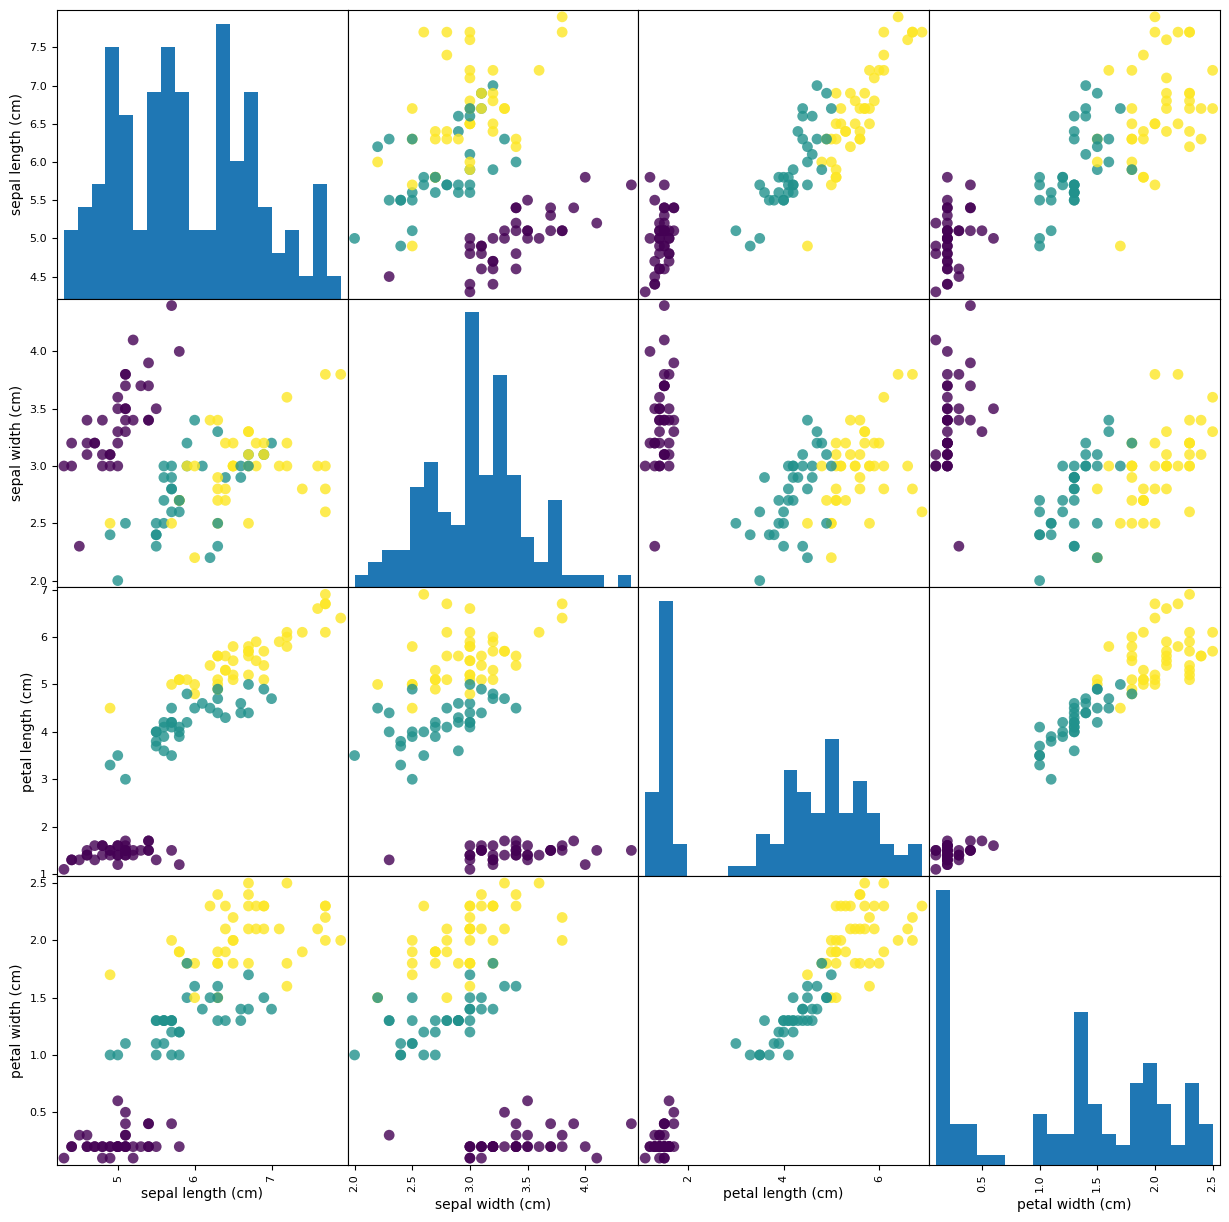

In [27]:
# In order to make visualizations with our training data we need to put it in a DataFrame format
train_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# Let's try a scatter matrix which makes multiple scatter plots of our variables
# setting the color "c" to our target variable will enable different colors for our classes
pd.plotting.scatter_matrix(train_df, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)

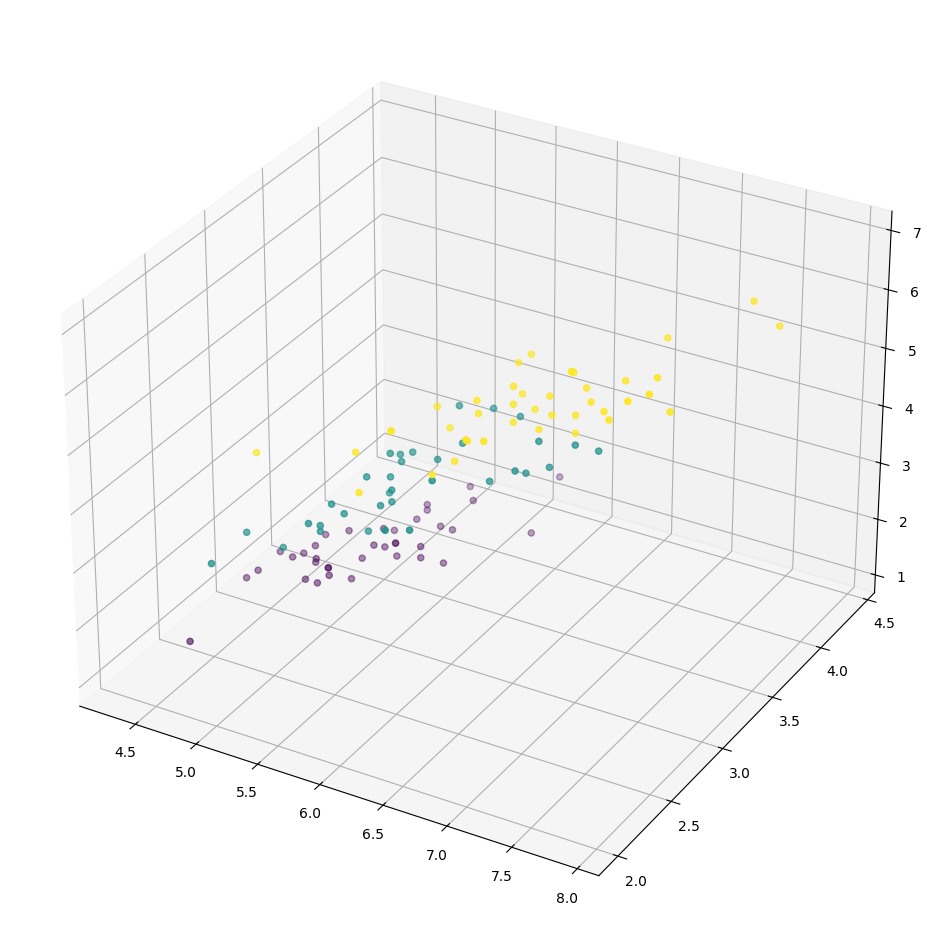

In [28]:
# Because we only have 3 features we can also do a 3D plot
# This can also help illustrate how distance works in KNN
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(train_df[iris_dataset.feature_names].to_numpy()[:,0], 
           train_df[iris_dataset.feature_names].to_numpy()[:,1], 
           train_df[iris_dataset.feature_names].to_numpy()[:,2], c=y_train)
plt.show()

In [29]:
# After importing the sklearn.neighbors object we can fit our model 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# We can also try a prediction based on imagined data
X_new = np.array([[2, 4.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])


Prediction: [0]
Predicted target name: ['setosa']


In [30]:
# To evaluate the model we need to make predictions for our test data
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)
# Based on that we can calculate the accuracy of our model
print("Test set score: ", knn.score(X_test, y_test))
# We can also see how this score is determined thusly
print("Test set score: ", np.mean(y_pred == y_test))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score:  0.9736842105263158
Test set score:  0.9736842105263158


#### Classifying Roads (custom example)

In [31]:
# This second example was made by me and will show how
# to use data loaded from a CSV into a DataFrame for KNN modeling
columbusroads_df = pd.read_csv('lab3_data_roads.csv')

In [32]:
# This is how I feed data from a DataFrame into train_test_split
# I suggest using this until you decide on your own preference
features_to_use = ['LANES', 'LANES_WID', 'MEDIAN_WID']
X_data = columbusroads_df[features_to_use].to_numpy()
y_data = columbusroads_df['CLASS_NUM'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)
# Let's look at shape of our train and test data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4566, 3)
y_train shape: (4566,)
X_test shape: (1522, 3)
y_test shape: (1522,)


array([[<Axes: xlabel='LANES', ylabel='LANES'>,
        <Axes: xlabel='LANES_WID', ylabel='LANES'>,
        <Axes: xlabel='MEDIAN_WID', ylabel='LANES'>],
       [<Axes: xlabel='LANES', ylabel='LANES_WID'>,
        <Axes: xlabel='LANES_WID', ylabel='LANES_WID'>,
        <Axes: xlabel='MEDIAN_WID', ylabel='LANES_WID'>],
       [<Axes: xlabel='LANES', ylabel='MEDIAN_WID'>,
        <Axes: xlabel='LANES_WID', ylabel='MEDIAN_WID'>,
        <Axes: xlabel='MEDIAN_WID', ylabel='MEDIAN_WID'>]], dtype=object)

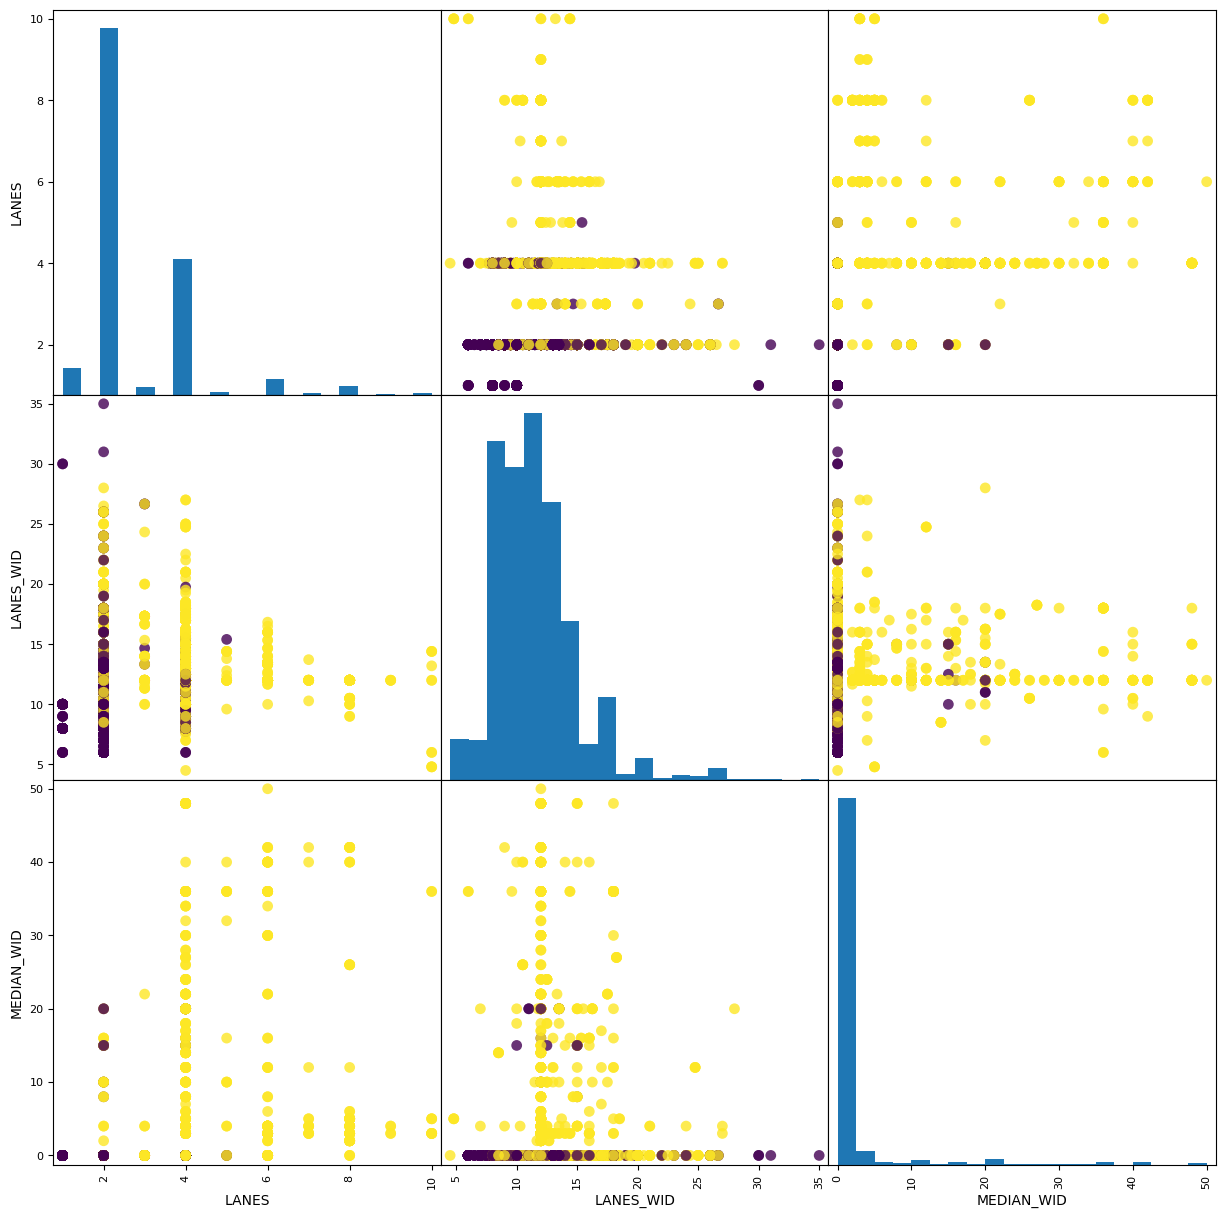

In [33]:
# In order to make visualizations with our training data we need to put it in a DataFrame format
train_df = pd.DataFrame(X_train, columns=features_to_use)
# Let's try a scatter matrix which makes multiple scatter plots of our variables
# setting the color "c" to our target variable will enable different colors for our classes
pd.plotting.scatter_matrix(train_df, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)

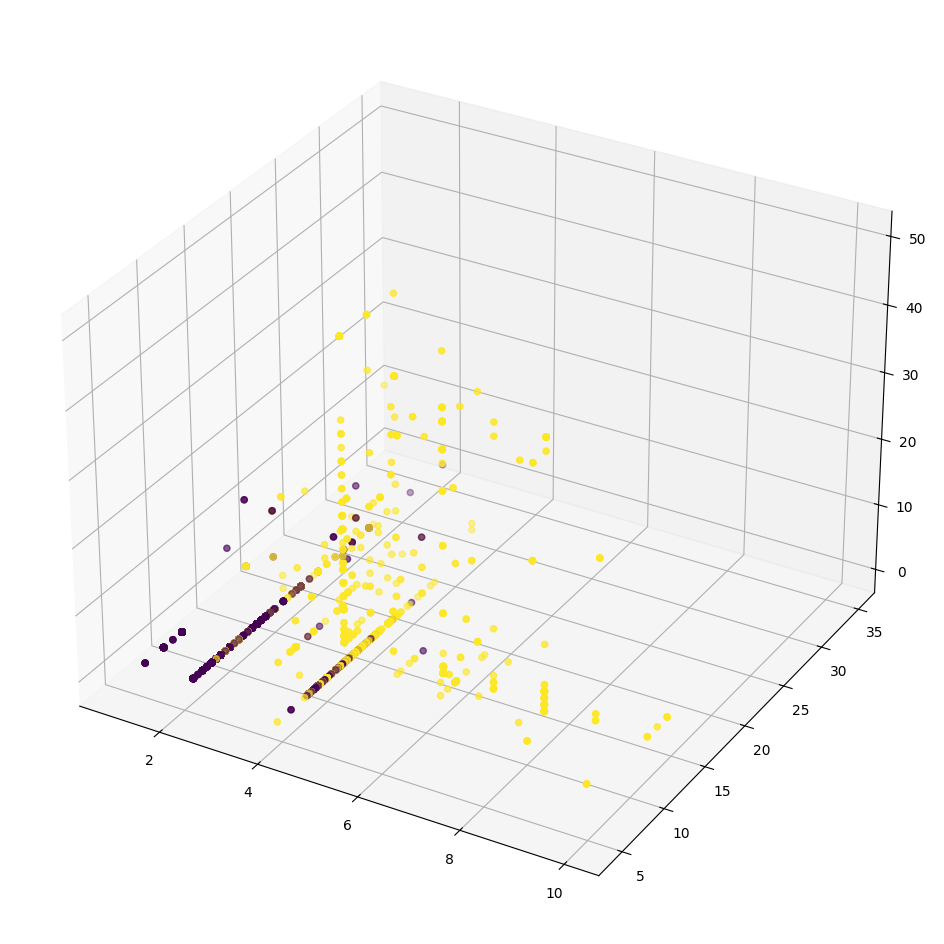

In [34]:
# Because we only have 3 features we can also do a 3D plot
# This can also help illustrate how distance works in KNN
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(train_df[features_to_use].to_numpy()[:,0], 
           train_df[features_to_use].to_numpy()[:,1], 
           train_df[features_to_use].to_numpy()[:,2], c=y_train)
plt.show()

In [35]:
# After importing the sklearn.neighbors object we can fit our model 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# We can also try a prediction based on imagined data
X_new = np.array([[4, 8, 5]])
prediction = knn.predict(X_new)
print("Prediction: ", prediction)

Prediction:  [1]


In [36]:
# To evaluate the model we need to make predictions for our test data
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)
# Based on that we can calculate the accuracy of our model
print("Test set score: ", knn.score(X_test, y_test))

Test set predictions:
 [0 0 0 ... 0 1 0]
Test set score:  0.7772667542706965


In [37]:
# Because this score is lower, let's get more information using a confusion matrix
from sklearn.metrics import confusion_matrix
# this function compares the actual test data target values with what the model predicts
# the results form with matrix of true positive, false positive on top
# and false negative, true negative positive on bottom
print(confusion_matrix(y_test,y_pred))

[[791  55]
 [284 392]]


###  OLS Linear Regression

#### Predicting Median Housing Price for California Census Blocks

In [38]:
# Load in more built-in data from sklearn
from sklearn.datasets import fetch_california_housing
calhousing_dataset = fetch_california_housing()
# This is again a "bunch" which is a dictionary-type object with "keys"
print(calhousing_dataset.keys())
# Let's print out all the details
print(calhousing_dataset.data)
print(calhousing_dataset.feature_names)
#print(calhousing_dataset.target)
#print(calhousing_dataset.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [39]:
# As we did in the first example let's feed this data into the
# "train_test_split" function of sklearn (yes, this is done for regression too)
X_train, X_test, y_train, y_test = train_test_split(calhousing_dataset['data'], calhousing_dataset['target'], random_state=0)
# Let's look at shape of our train and test data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (15480, 8)
y_train shape: (15480,)
X_test shape: (5160, 8)
y_test shape: (5160,)


In [40]:
# after importing the sklearn linear_model object
# we can very easily fit our OLS training model
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
# and then very easily get is accuracy score, which is an R-Squared
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.61
Test set score: 0.59


In [41]:
# with our model we can now make predictions with imagined or real data
print('A prediction: ', lr.predict(np.array([[43239,9,10,2,6523,3,36.692408,-121.612099]])))
# we can also see the coefficients, which tell us how different features effect the target
display(pd.DataFrame(zip(calhousing_dataset.feature_names, lr.coef_)))

A prediction:  [18986.52568039]


,0,1
0,MedInc,0.439091
1,HouseAge,0.009599
2,AveRooms,-0.103311
3,AveBedrms,0.616730
4,Population,-0.000008
5,AveOccup,-0.004488
6,Latitude,-0.417353
7,Longitude,-0.430614
